In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("mushrooms.csv")

In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
X = df.drop('class',axis=1)

In [9]:
y = df['class']

In [10]:
X = pd.get_dummies(X,drop_first=True)

In [11]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [18]:
gb_model = GradientBoostingClassifier()

In [19]:
grid = GridSearchCV(gb_model,param_grid)

In [20]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [21]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [24]:
from sklearn.metrics import classification_report,accuracy_score

In [25]:
predictions = grid.predict(X_test)

In [26]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [28]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 4.93623014e-17, 0.00000000e+00, 0.00000000e+00,
       1.29523613e-16, 1.04652037e-03, 1.18312069e-05, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 1.84894034e-17, 0.00000000e+00,
       6.30967219e-17, 0.00000000e+00, 0.00000000e+00, 6.04605717e-05,
       2.31055039e-03, 5.17747360e-02, 1.84253604e-04, 1.40535263e-02,
       1.82499853e-02, 2.07201141e-04, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.08905809e-02, 0.00000000e+00, 2.09491083e-16, 1.85130700e-18,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.60211941e-18, 0.00000000e+00, 2.36745656e-17, 5.45446462e-18,
       4.39922283e-04, 7.93759017e-04, 1.36009198e-01, 4.69032068e-03,
       2.63443850e-02, 4.47043435e-04, 1.43555976e-03, 6.53373439e-06,
       1.83319493e-05, 7.75797462e-05, 3.97522070e-02, 3.14455538e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [29]:
feat_import = grid.best_estimator_.feature_importances_

In [30]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [31]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,4.936230e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.295236e-16
...,...
habitat_l,0.000000e+00
habitat_m,1.045678e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [32]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.136009
bruises_t,0.051775
stalk-surface-below-ring_y,0.039752
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_p,0.000000
veil-color_o,0.000000
veil-color_w,0.000000
gill-color_e,0.000000


In [33]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064637,0.0,0.0,0.000004,0.000802,0.614744


In [34]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [35]:
imp_feats.sort_values('Importance')

,Importance
population_y,0.000550
stalk-color-below-ring_w,0.000563
stalk-root_b,0.000794
stalk-color-above-ring_w,0.000810
ring-type_p,0.000895
cap-surface_g,0.001047
ring-type_n,0.001165
stalk-surface-above-ring_s,0.001436
cap-color_y,0.002311
ring-number_o,0.002629


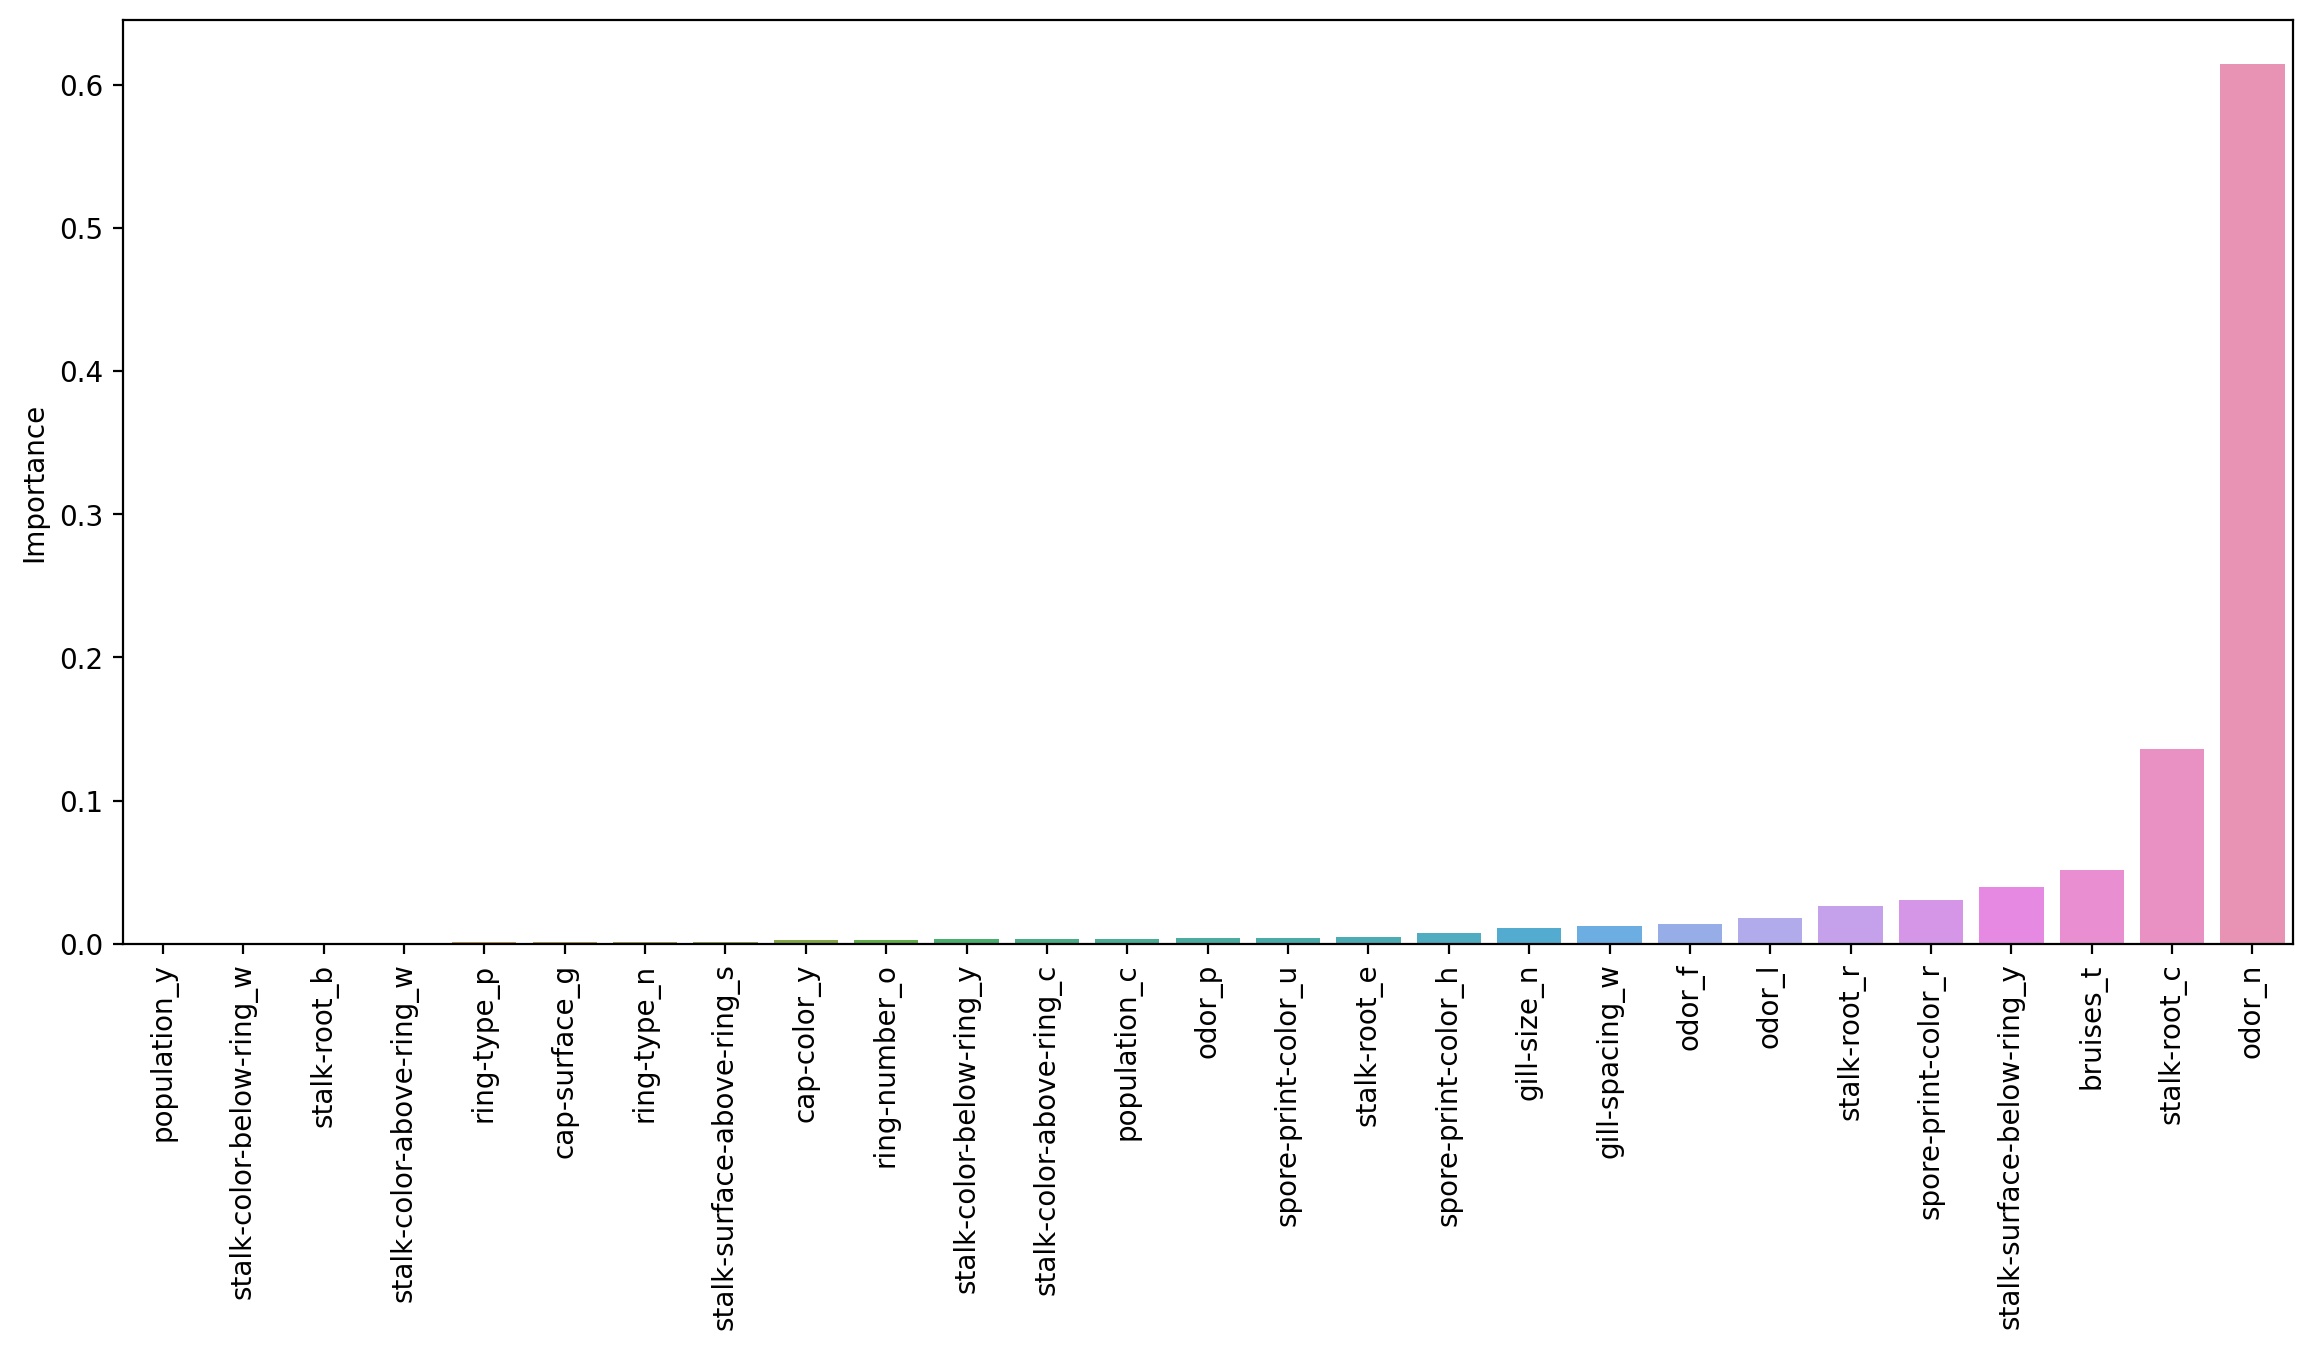

In [36]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);